In [44]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mplsoccer import Pitch, add_image,FontManager
from PIL import Image
import matplotlib.image as mpimg
from pywaffle import Waffle
from highlight_text import fig_text
from soccerplots.radar_chart import Radar
from scipy import stats

In [45]:
# cyberpunk
# fm = FontManager('https://github.com/google/fonts/blob/main/ofl/sedgwickave/'
#                  'SedgwickAve-Regular.ttf?raw=true')

In [46]:
comps = ["liga","premier"]
season = "2122"
df1 = []
df2 = []
for comp in comps:
    df_def = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/defense.csv")
    df_gs = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/gca.csv")
    df_mis = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/misc.csv")
    df_pass = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/passing.csv")
    df_ptype = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/passing_types.csv")
    df_pos = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/possession.csv")
    df_shot = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/shooting.csv")
    df_stan = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/standard.csv")
    df = pd.concat([df_def, 
                    df_gs, df_mis, 
                    df_pass, 
                    df_ptype, df_pos, 
                    df_shot, 
                    df_stan], axis=1)
    df = df.loc[:,~df.columns.duplicated()]
#     df = df.dropna()
    if comp == comps[0]:
        df1 = df
    elif comp == comps[1]:
        df2 = df

In [19]:
def setup(df,pos):
    df.loc[:, cols_not_90[7:]] = df.loc[:, cols_not_90[7:]].apply(lambda x:x / df["90s"])
    df["Def Duels Win %"] = (df['TklW_Tackles'] / df['Tkl_Tackles'])*100
    df["Goal Conversion %"] = (df["G-PK_Performance"] / df['Sh_Standard']) * 100
    
#     df = df[(df["Player"].str.contains("Lenglet"))]
    df = df[df["Pos"].str.contains(pos)]
#     df = df.drop(columns=["90s","Player"])
    return df

In [20]:
cols = df.columns.unique()
cols_not_90 = []
for col in cols:
    if "90" in col:
        continue
    elif "%" in col:
        continue
    else:
        cols_not_90.append(col)

df1 = setup(df1,"MF")
df2 = setup(df2,"MF")
df = pd.concat([df1,df2])

<ipython-input-19-3a5129f05c21>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["Def Duels Win %"] = (df['TklW_Tackles'] / df['Tkl_Tackles'])*100
<ipython-input-19-3a5129f05c21>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["Goal Conversion %"] = (df["G-PK_Performance"] / df['Sh_Standard']) * 100
<ipython-input-19-3a5129f05c21>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using p

In [23]:
params = ['Player', 'npxG_Expected', "xA_Expected",
          'Succ_Dribbles', 'Succ%_Dribbles', 'PrgDist_Carries', 'PrgDist_Total',
          'Cmp%_Short', 'Cmp%_Medium', 'Cmp%_Long', 'KP',
          'Tkl_Tackles', 'Def Duels Win %', 'Int', 'Won%_Aerial Duels']
target_df = df[params]
target_df = target_df.replace([np.inf, -np.inf], np.nan)
target_df.fillna(0,inplace=True)
# target_df.dropna(inplace=True)
print("params :",len(params[1:]))

params : 14


In [24]:
describer = target_df.describe()

range_max = describer.loc['mean',:] + (describer.loc['std',:]*1.5)
range_min = describer.loc['min',:]
range_mean = describer.loc['mean',:]

ranges = []
for i in range(len(range_max)):
    _max = range_max[i]
    _min = range_min[i]
    ranges.append((_min, _max))
# ranges[2] = (0, describer.loc["mean","Goal Conversion %"])
ranges[2] = (0, 2)
ranges[3] = (0, 100)
ranges[6] = (0, 100)
ranges[7] = (0, 100)
ranges[8] = (0, 100)
# ranges[10] = (0, 1)
ranges[11] = (0, 100)
ranges[13] = (0, 100)
ranges

[(0.0, 0.6827268669175555),
 (0.0, 0.28801343888909275),
 (0, 2),
 (0, 100),
 (0.0, 169.4742152116569),
 (0.0, 200.98239918167872),
 (0, 100),
 (0, 100),
 (0, 100),
 (0.0, 2.4356795021991235),
 (0.0, 3.353015859640214),
 (0, 100),
 (0.0, 2.2235846246782507),
 (0, 100)]

In [26]:
player = "Raphael"
player2 = "Ousmane"
dfP = target_df[(target_df["Player"].str.contains(player))|(target_df["Player"].str.contains(player2))]
dfP

,Player,npxG_Expected,xA_Expected,Succ_Dribbles,Succ%_Dribbles,PrgDist_Carries,PrgDist_Total,Cmp%_Short,Cmp%_Medium,Cmp%_Long,KP,Tkl_Tackles,Def Duels Win %,Int,Won%_Aerial Duels
139,Ousmane Dembélé,0.178344,0.496815,3.630573,62.0,252.229299,188.853503,86.9,75.7,49.2,2.929936,1.656051,73.076923,0.828025,38.5
112,Raphael Dias Belloli,0.253086,0.209877,1.820988,39.6,105.987654,189.475309,82.0,69.6,37.7,2.006173,1.666667,46.296296,1.327160,40.3


In [27]:
rename_params = ['non-pena\nxG', "xA", 'win-Dribbles', 'win-Dribble%', 'Progressive\nDribbles', "Progressive\nPass", 
                 'Comp\nShortPass%', 'Comp\nMediumPass%', 'Comp\nLongPass%', 'keyPass', 'Tackles', 'Tackle Win%', 'Intercept', 'Aerial Duels%']

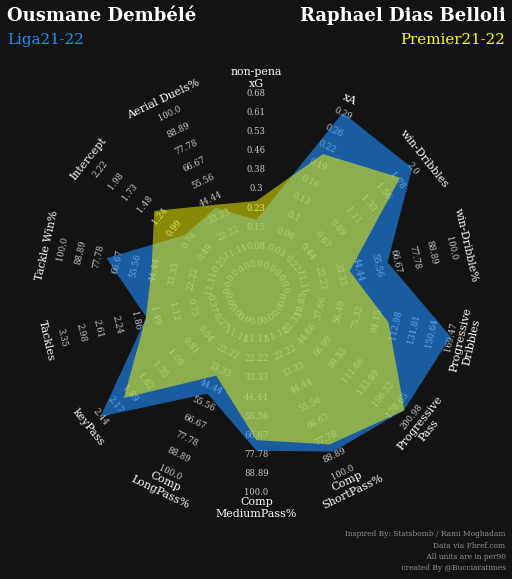

In [35]:
oneColor = '#135ED6'
theOtherColor = '#BB1D3A'
name = dfP.iloc[0,0]
name2 = dfP.iloc[1,0]

title = dict(
    title_name=name.title(),
    title_color='#ffffff',
    subtitle_name='Liga21-22',
    subtitle_color='dodgerblue',
    title_name_2=name2.title(),
    title_color_2="#ffffff",
    subtitle_name_2='Premier21-22',
    subtitle_color_2='yellow',
    title_fontsize=18,
    subtitle_fontsize=15,
)

endnote = "Data via Fbref.com\n All units are in per90\n created By @Bucciaratimes"

radar = Radar(background_color="#131313",
              patch_color="#131313", 
              label_color="#ffffff",
              range_color="#cccccc",
              label_fontsize=11,
              range_fontsize=8.5,
              fontfamily="Serif"
             )

fig, ax = radar.plot_radar(ranges=ranges, 
                           params=rename_params, 
                           values=dfP.iloc[[0,1],1:].values, title=title,
                           radar_color=["dodgerblue","yellow"],
                           alphas=[0.6, 0.5],
                           endnote=endnote, 
                           end_size=7.5,
#                            image='/work/assets/image/barcelona.png',
#                            image_coord=[.477, 0.802, 0.07, 0.1],alpha=.98,
                           compare=True
                          )

plt.savefig(f'/work/output/barcelona/{player}.png', dpi=250, bbox_inches="tight",facecolor='#131313')

In [168]:
comp = "cl"
season = "2122"

df_def = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/defense.csv")
df_gs = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/gca.csv")
df_mis = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/misc.csv")
df_pass = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/passing.csv")
df_ptype = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/passing_types.csv")
df_pos = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/possession.csv")
df_shot = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/shooting.csv")
df_stan = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/stats.csv")
df = pd.concat([df_def, 
                df_gs, df_mis, 
                df_pass, 
                df_ptype, df_pos, 
                df_shot, 
                df_stan], axis=1)
df = df.loc[:,~df.columns.duplicated()]
#     df = df.dropna()

In [169]:
cols = df.columns.unique()

cols_not_90 = []
for col in cols:
    if "90" in col:
        continue
    elif "%" in col:
        continue
    else:
        cols_not_90.append(col)

In [170]:
def setup(df,pos):
    df.loc[:, cols_not_90[7:]] = df.loc[:, cols_not_90[7:]].apply(lambda x:x / df["90s"])
    df["Def Duels Win %"] = (df['TklW_Tackles'] / df['Tkl_Tackles'])*100
    df["Goal Conversion %"] = (df["G-PK_Performance"] / df['Sh_Standard']) * 100
    
#     df = df[(df["Player"].str.contains("Lenglet"))]
    df = df[df["Pos"].str.contains(pos)]
#     df = df.drop(columns=["90s","Player"])
    return df

In [171]:
df = setup(df,"MF")

<ipython-input-170-3a5129f05c21>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["Def Duels Win %"] = (df['TklW_Tackles'] / df['Tkl_Tackles'])*100
<ipython-input-170-3a5129f05c21>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["Goal Conversion %"] = (df["G-PK_Performance"] / df['Sh_Standard']) * 100


In [172]:
params = ['Player', 'npxG_Expected', "xA_Expected",
          'Succ_Dribbles', 'Succ%_Dribbles', 'PrgDist_Carries', 'PrgDist_Total',
          'Cmp%_Short', 'Cmp%_Medium', 'Cmp%_Long', 'KP',
          'Tkl_Tackles', 'Def Duels Win %', 'Int', 'Won%_Aerial Duels']
target_df = df[params]
target_df = target_df.replace([np.inf, -np.inf], np.nan)
target_df.fillna(0,inplace=True)
# target_df.dropna(inplace=True)
print("params :",len(params[1:]))

params : 14


In [92]:
describer = target_df.describe()

range_max = describer.loc['mean',:] + (describer.loc['std',:]*2)
range_min = describer.loc['min',:]
range_mean = describer.loc['mean',:]

ranges = []
for i in range(len(range_max)):
    _max = range_max[i]
    _min = range_min[i]
    ranges.append((_min, _max))
# ranges[2] = (0, describer.loc["mean","Goal Conversion %"])
ranges[3] = (0, 100)
ranges[6] = (0, 100)
ranges[7] = (0, 100)
ranges[8] = (0, 100)
ranges[11] = (0, 100)
ranges[13] = (0, 100)

# # ranges[1] = (0, 100)
# # ranges[5] = (0, 100)
# # ranges[9] = (0, 10)
# # ranges[-2] = (0, 100)
# # ranges[-1] = (0, 100)
    
# print("ranges :",len(ranges))
ranges

[(0.0, 0.4369176633732804),
 (0.0, 0.5013675756245402),
 (0.0, 3.6154238152672016),
 (0, 100),
 (0.0, 219.40941476311716),
 (0.0, 386.652744362877),
 (0, 100),
 (0, 100),
 (0, 100),
 (0.0, 3.358798683877039),
 (0.0, 5.40741063507765),
 (0, 100),
 (0.0, 4.739476193448736),
 (0, 100)]

In [173]:
player = "Kessié"
player2 = "Frenkie"
dfP = target_df[(target_df["Player"].str.contains(player))|(target_df["Player"].str.contains(player2))]
dfP

,Player,npxG_Expected,xA_Expected,Succ_Dribbles,Succ%_Dribbles,PrgDist_Carries,PrgDist_Total,Cmp%_Short,Cmp%_Medium,Cmp%_Long,KP,Tkl_Tackles,Def Duels Win %,Int,Won%_Aerial Duels
288,Frenkie de Jong,0.051724,0.241379,1.206897,70.0,152.586207,195.689655,92.7,93.3,77.8,1.206897,1.724138,50.000000,0.689655,100.0
309,Franck Kessié,0.083333,0.083333,0.555556,50.0,76.666667,223.611111,91.2,90.6,60.6,0.833333,1.666667,66.666667,2.777778,81.8


In [174]:
rename_params = ['non-pena\nxG', "xA", 'win-Dribbles', 'win-Dribble%', 'Progressive\nDribbles', "Progressive\nPass", 
                 'Comp\nShortPass%', 'Comp\nMediumPass%', 'Comp\nLongPass%', 'keyPass', 'Tackles', 'Tackle Win%', 'Intercept', 'Aerial Duels%']

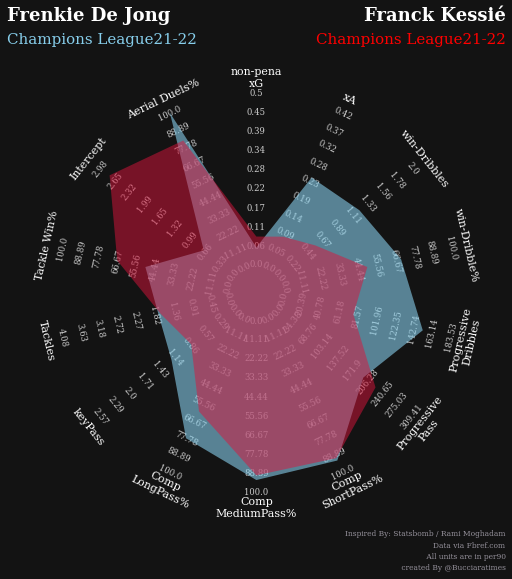

In [175]:
oneColor = '#135ED6'
theOtherColor = '#BB1D3A'
name = dfP.iloc[0,0]
name2 = dfP.iloc[1,0]

title = dict(
    title_name=name.title(),
    title_color='#ffffff',
    subtitle_name='Champions League21-22',
    subtitle_color='skyblue',
    title_name_2=name2.title(),
    title_color_2="#ffffff",
    subtitle_name_2='Champions League21-22',
    subtitle_color_2='red',
    title_fontsize=18,
    subtitle_fontsize=15,
)

endnote = "Data via Fbref.com\n All units are in per90\n created By @Bucciaratimes"

radar = Radar(background_color="#131313",
              patch_color="#131313", 
              label_color="#ffffff",
              range_color="#cccccc",
              label_fontsize=11,
              range_fontsize=8.5,
              fontfamily="Serif"
             )

fig, ax = radar.plot_radar(ranges=ranges, 
                           params=rename_params, 
                           values=dfP.iloc[[0,1],1:].values, title=title,
                           radar_color=["skyblue","crimson"],
                           alphas=[0.6, 0.5],
                           endnote=endnote, 
                           end_size=7.5,
#                            image='/work/assets/image/barcelona.png',
#                            image_coord=[.477, 0.802, 0.07, 0.1],alpha=.98,
                           compare=True
                          )

plt.savefig(f'/work/output/{player}-{player2}.png', dpi=250, bbox_inches="tight",facecolor='#131313')

### FW


In [47]:
comps = ["liga","premier"]
season = "2122"
df1 = []
df2 = []
for comp in comps:
    df_def = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/defense.csv")
    df_gs = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/gca.csv")
    df_mis = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/misc.csv")
    df_pass = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/passing.csv")
    df_ptype = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/passing_types.csv")
    df_pos = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/possession.csv")
    df_shot = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/shooting.csv")
    df_stan = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/standard.csv")
    df = pd.concat([df_def, 
                    df_gs, df_mis, 
                    df_pass, 
                    df_ptype, df_pos, 
                    df_shot, 
                    df_stan], axis=1)
    df = df.loc[:,~df.columns.duplicated()]
#     df = df.dropna()
    if comp == comps[0]:
        df1 = df
    elif comp == comps[1]:
        df2 = df
        
cols = df.columns.unique()
cols_not_90 = []
for col in cols:
    if "90" in col:
        continue
    elif "%" in col:
        continue
    else:
        cols_not_90.append(col)

df1 = setup(df1,"FW")
df2 = setup(df2,"FW")
df = pd.concat([df1,df2])

<ipython-input-19-3a5129f05c21>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["Def Duels Win %"] = (df['TklW_Tackles'] / df['Tkl_Tackles'])*100
<ipython-input-19-3a5129f05c21>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["Goal Conversion %"] = (df["G-PK_Performance"] / df['Sh_Standard']) * 100
<ipython-input-19-3a5129f05c21>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using p

In [51]:
df.columns.tolist()

['Unnamed: 0',
 'Player',
 'Nation',
 'Pos',
 'Squad',
 'Age',
 'Born',
 '90s',
 'Tkl_Tackles',
 'TklW_Tackles',
 'Def 3rd_Tackles',
 'Mid 3rd_Tackles',
 'Att 3rd_Tackles',
 'Tkl_Vs Dribbles',
 'Att_Vs Dribbles',
 'Tkl%_Vs Dribbles',
 'Past_Vs Dribbles',
 'Press_Pressures',
 'Succ_Pressures',
 '%_Pressures',
 'Def 3rd_Pressures',
 'Mid 3rd_Pressures',
 'Att 3rd_Pressures',
 'Blocks_Blocks',
 'Sh_Blocks',
 'ShSv_Blocks',
 'Pass_Blocks',
 'Int',
 'Tkl+Int',
 'Clr',
 'Err',
 'SCA_SCA',
 'SCA90_SCA',
 'PassLive_SCA Types',
 'PassDead_SCA Types',
 'Drib_SCA Types',
 'Sh_SCA Types',
 'Fld_SCA Types',
 'Def_SCA Types',
 'GCA_GCA',
 'GCA90_GCA',
 'PassLive_GCA Types',
 'PassDead_GCA Types',
 'Drib_GCA Types',
 'Sh_GCA Types',
 'Fld_GCA Types',
 'Def_GCA Types',
 'CrdY_Performance',
 'CrdR_Performance',
 '2CrdY_Performance',
 'Fls_Performance',
 'Fld_Performance',
 'Off_Performance',
 'Crs',
 'TklW',
 'PKwon_Performance',
 'PKcon_Performance',
 'OG_Performance',
 'Recov_Performance',
 'Won_Aeri

In [56]:
params = ['Player', 'npxG_Expected', "xA_Expected",
          'Succ_Dribbles', 'Succ%_Dribbles', 'PrgDist_Carries', 'PrgDist_Total',
          'Cmp%_Short', 'Cmp%_Medium', 'Cmp%_Long', 'KP',
          'SCA_SCA', "Gls_Performance", 'Goal Conversion %', 'SoT%_Standard']
target_df = df[params]
target_df = target_df.replace([np.inf, -np.inf], np.nan)
target_df.fillna(0,inplace=True)
# target_df.dropna(inplace=True)
print("params :",len(params[1:]))

describer = target_df.describe()

range_max = describer.loc['mean',:] + (describer.loc['std',:]*2)
range_min = describer.loc['min',:]
range_mean = describer.loc['mean',:]

ranges = []
for i in range(len(range_max)):
    _max = range_max[i]
    _min = range_min[i]
    ranges.append((_min, _max))
# ranges[2] = (0, describer.loc["mean","Goal Conversion %"])
ranges[2] = (0, 2)
ranges[3] = (0, 100)
ranges[6] = (0, 100)
ranges[7] = (0, 100)
ranges[8] = (0, 100)
# ranges[10] = (0, 1)
# ranges[11] = (0, 100)
# ranges[13] = (0, 100)

player = "Raphael"
player2 = "Ousmane"
dfP = target_df[(target_df["Player"].str.contains(player))|(target_df["Player"].str.contains(player2))]

rename_params = ['non-pena\nxG', "xA", 'win-Dribbles', 'win-Dribble%', 'Progressive\nDribbles', "Progressive\nPass", 
                 'Comp\nShortPass%', 'Comp\nMediumPass%', 'Comp\nLongPass%', 'keyPass', 'Shot\nCreate-Act', 'Goal', 'Goal-Conversion%', 'Shot\nOn-Target%']

params : 14


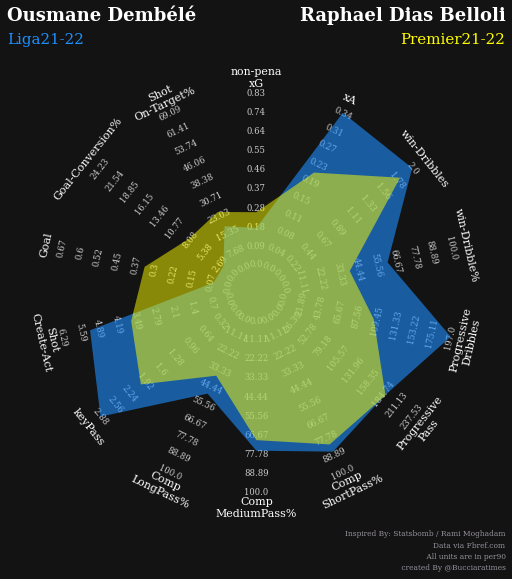

In [58]:
oneColor = '#135ED6'
theOtherColor = '#BB1D3A'
name = dfP.iloc[0,0]
name2 = dfP.iloc[1,0]

title = dict(
    title_name=name.title(),
    title_color='#ffffff',
    subtitle_name='Liga21-22',
    subtitle_color='dodgerblue',
    title_name_2=name2.title(),
    title_color_2="#ffffff",
    subtitle_name_2='Premier21-22',
    subtitle_color_2='yellow',
    title_fontsize=18,
    subtitle_fontsize=15,
)

endnote = "Data via Fbref.com\n All units are in per90\n created By @Bucciaratimes"

radar = Radar(background_color="#131313",
              patch_color="#131313", 
              label_color="#ffffff",
              range_color="#cccccc",
              label_fontsize=11,
              range_fontsize=8.5,
              fontfamily="Serif"
             )

fig, ax = radar.plot_radar(ranges=ranges, 
                           params=rename_params, 
                           values=dfP.iloc[[0,1],1:].values, title=title,
                           radar_color=["dodgerblue","yellow"],
                           alphas=[0.6, 0.5],
                           endnote=endnote, 
                           end_size=7.5,
#                            image='/work/assets/image/barcelona.png',
#                            image_coord=[.477, 0.802, 0.07, 0.1],alpha=.98,
                           compare=True
                          )

plt.savefig(f'/work/output/barcelona/{player}.png', dpi=250, bbox_inches="tight",facecolor='#131313')

In [81]:
import matplotlib.font_manager as fm
fm.findSystemFonts()

['/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc',
 '/usr/share/fonts/opentype/ipafont-gothic/ipagp.ttf',
 '/usr/share/fonts/opentype/noto/NotoSerifCJK-Regular.ttc',
 '/usr/share/fonts/opentype/ipafont-mincho/ipam.ttf',
 '/usr/share/fonts/opentype/ipafont-gothic/ipag.ttf',
 '/usr/share/fonts/truetype/takao-gothic/TakaoPGothic.ttf',
 '/usr/share/fonts/truetype/takao-mincho/TakaoPMincho.ttf',
 '/usr/share/fonts/truetype/fonts-japanese-gothic.ttf',
 '/usr/share/fonts/opentype/noto/NotoSerifCJK-Bold.ttc',
 '/usr/share/fonts/truetype/takao-mincho/TakaoMincho.ttf',
 '/usr/share/fonts/opentype/noto/NotoSansCJK-Bold.ttc',
 '/usr/share/fonts/truetype/fonts-japanese-mincho.ttf',
 '/usr/share/fonts/opentype/ipafont-mincho/ipamp.ttf']

In [30]:
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']


In [35]:
mpl.matplotlib_fname()

'/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'

In [44]:
import matplotlib.font_manager
matplotlib.font_manager._rebuild()

AttributeError: module 'matplotlib.font_manager' has no attribute '_rebuild'

In [46]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Meiryo"]

In [57]:
import shutil
import matplotlib

shutil.rmtree(matplotlib.get_cachedir())

FileNotFoundError: [Errno 2] No such file or directory: '/root/.cache/matplotlib'

In [82]:
import matplotlib.font_manager
print([f.name for f in matplotlib.font_manager.fontManager.ttflist])


['DejaVu Sans Mono', 'DejaVu Serif Display', 'cmmi10', 'DejaVu Sans Mono', 'DejaVu Serif', 'STIXSizeThreeSym', 'STIXSizeTwoSym', 'STIXGeneral', 'DejaVu Sans Display', 'DejaVu Sans', 'DejaVu Sans', 'STIXSizeOneSym', 'STIXNonUnicode', 'STIXSizeTwoSym', 'DejaVu Serif', 'cmr10', 'STIXGeneral', 'STIXSizeFourSym', 'cmsy10', 'DejaVu Sans', 'STIXGeneral', 'STIXSizeFiveSym', 'cmex10', 'cmss10', 'STIXSizeThreeSym', 'DejaVu Sans Mono', 'DejaVu Serif', 'STIXSizeOneSym', 'DejaVu Sans', 'STIXNonUnicode', 'DejaVu Serif', 'DejaVu Sans Mono', 'STIXNonUnicode', 'cmb10', 'cmtt10', 'STIXSizeFourSym', 'STIXGeneral', 'STIXNonUnicode']


In [53]:
matplotlib.matplotlib_fname()

'/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'

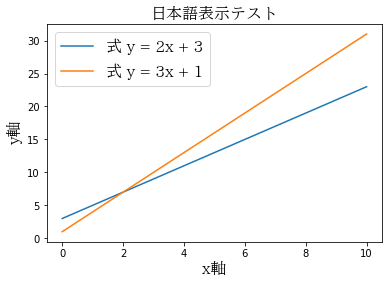

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
fp = FontProperties(fname=r'/usr/share/fonts/opentype/ipaexfont-mincho/ipaexm.ttf', size=16)
 
# データ準備
x = np.linspace(0, 10, 5)     # 横軸の描画範囲指定
y1 = 2 * x + 3    # 式1 y = 2x + 3より、縦軸の値算出
y2 = 3 * x + 1    # 式2 y = 3x + 1より、縦軸の値算出
 
# グラフの装飾
plt.title('日本語表示テスト', fontproperties=fp) # タイトル
plt.xlabel("x軸", fontproperties=fp) # x軸ラベル
plt.ylabel("y軸", fontproperties=fp) # y軸ラベル
 
# グラフの描画
plt.plot(x, y1, label="式 y = 2x + 3")   # 式1の描画
plt.plot(x, y2, label="式 y = 3x + 1")   # 式2の描画
plt.legend(loc="upper left", prop=fp) # 凡例表示
plt.show()

In [ ]:
/usr/share/fonts/opentype/ipafont-gothic/ipagp.ttf: IPAPGothic:style=Regular
/usr/share/fonts/opentype/ipaexfont-mincho/ipaexm.ttf: IPAexMincho:style=Regular
/usr/share/fonts/opentype/ipafont-mincho/ipamp.ttf: IPAPMincho:style=Regular
/usr/share/fonts/opentype/ipaexfont-gothic/ipaexg.ttf: IPAexGothic:style=Regular
/usr/share/fonts/opentype/ipafont-gothic/ipag.ttf: IPAGothic:style=Regular
/usr/share/fonts/opentype/ipafont-mincho/ipam.ttf: IPAMincho:style=Regular

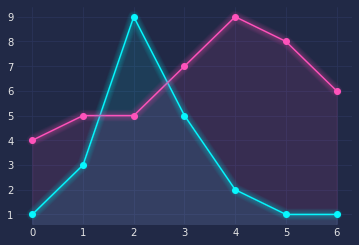

In [26]:
import matplotlib.pyplot as plt
import mplcyberpunk

plt.style.use("cyberpunk")

plt.plot([1, 3, 9, 5, 2, 1, 1], marker='o')
plt.plot([4, 5, 5, 7, 9, 8, 6], marker='o')

mplcyberpunk.add_glow_effects()

plt.show()

In [125]:
4793/27.5

174.29090909090908